In [130]:
import numpy as np
from scipy import stats 
import pandas as pd
from pandas import Series, DataFrame 

import matplotlib.pyplot as plt 
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

import sys
from pathlib import Path
import tarfile
import itertools
import urllib.request
import re

import requests
from bs4 import BeautifulSoup

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,MinMaxScaler,StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer,IterativeImputer
from sklearn import set_config
from sklearn.ensemble import IsolationForest
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.compose import TransformedTargetRegressor
from sklearn.utils import resample

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [6]:
path=Path('/mnt/All/Downloads/Datasets/')
SP500_SECTORS_CSV = path / 'sp500_sectors.csv'
SP500_DATA_CSV = path / 'sp500_data.csv.gz'
sp500_px=pd.read_csv(SP500_DATA_CSV,index_col=0)
sp500_sym=pd.read_csv(SP500_SECTORS_CSV)
kc_tax=pd.read_csv('/mnt/All/Downloads/Datasets/kc_tax.csv')
airline_stats=pd.read_csv(path/'airline_stats.csv')
loans=pd.read_csv(path/'loans_income.csv')

<Axes: title={'center': 'pct_carrier_delay'}, xlabel='airline'>

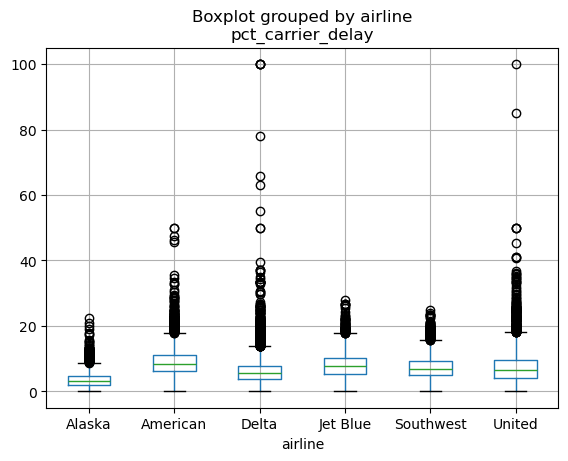

In [7]:
airline_stats.boxplot(by='airline',column='pct_carrier_delay')

<Axes: xlabel='airline', ylabel='pct_carrier_delay'>

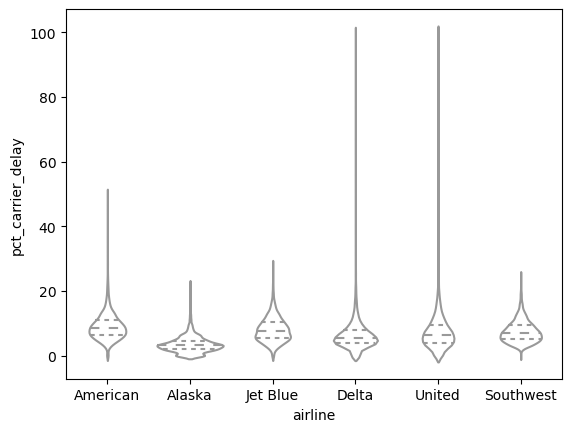

In [8]:
sns.violinplot(data=airline_stats,x='airline',y='pct_carrier_delay',inner='quartile', color='white')

seaborn.axisgrid.FacetGrid

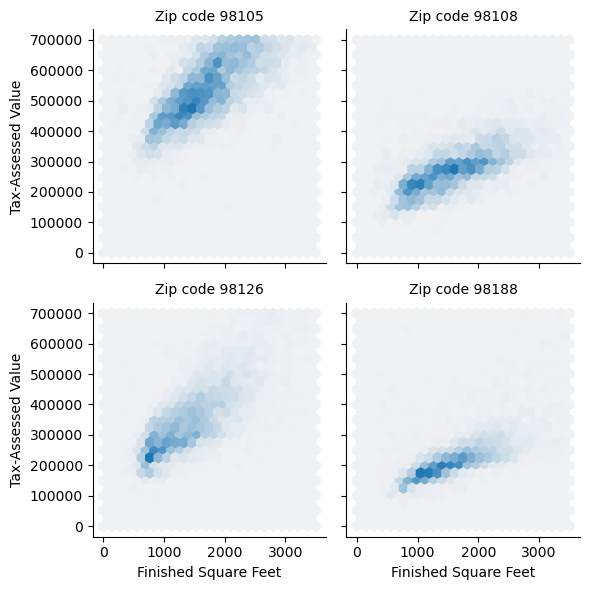

In [9]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax_zip=kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')
type(g)

In [10]:
result=[]
for _ in range(1000):
    sample=resample(loans)
    result.append(sample.mean().iloc[0])
results=Series(result)
results

0      68816.86826
1      68741.28954
2      68652.68732
3      68582.91048
4      68741.01802
          ...     
995    68829.45612
996    68969.92144
997    68952.00128
998    68726.18820
999    68893.04578
Length: 1000, dtype: float64

In [11]:
print('Bootstrap Statistics:')
print(f'original: {loans.median()}')
print(f'bias: {results.mean() - loans.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: x    62000.0
dtype: float64
bias: x    6762.924113
dtype: float64
std. error: 148.397656156259


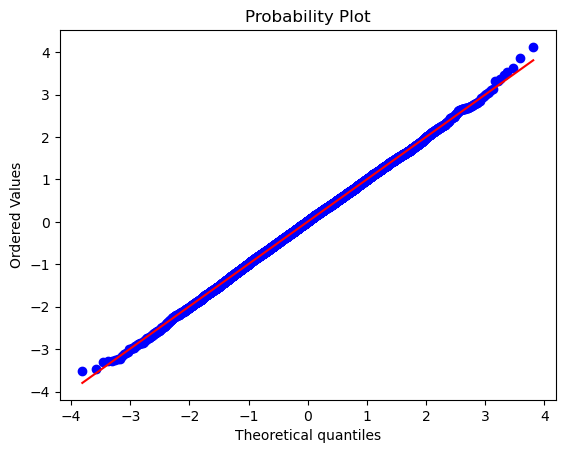

In [12]:
fig,ax=plt.subplots()
norm_sample = stats.norm.rvs(size=10000)
stats.probplot(norm_sample,plot=ax);

(array([  3.,   9.,  27., 164., 480., 576., 237.,  90.,  19.,   7.]),
 array([-6.60529819, -5.34098137, -4.07666455, -2.81234774, -1.54803092,
        -0.2837141 ,  0.98060272,  2.24491954,  3.50923636,  4.77355318,
         6.03787   ]),
 <BarContainer object of 10 artists>)

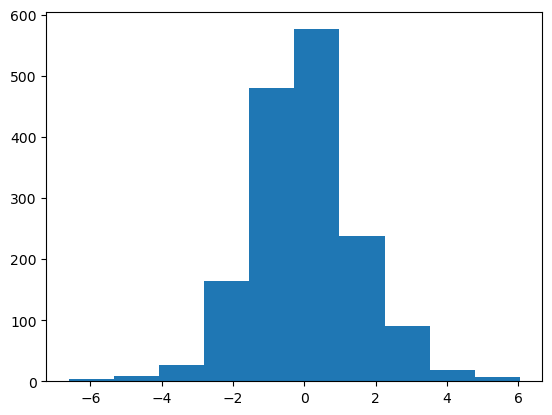

In [13]:
nflx=sp500_px.NFLX
nflx=np.diff(np.log(nflx[nflx>0]))
# fig,ax=plt.subplots()
# stats.probplot(nflx,plot=ax)
plt.hist(nflx)

In [14]:
stats.binom.cdf(2,4,0.5)

0.6875

(array([   9.,   76.,  492., 1246., 2082., 2290., 1230.,  451.,   98.,
          26.]),
 array([1.48 , 1.584, 1.688, 1.792, 1.896, 2.   , 2.104, 2.208, 2.312,
        2.416, 2.52 ]),
 <BarContainer object of 10 artists>)

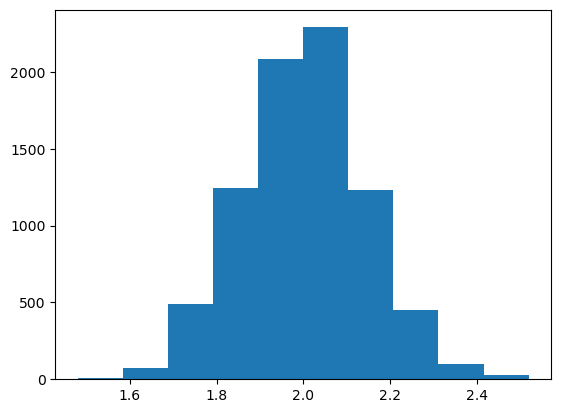

In [15]:
resul=[]
for _ in range(8000):
    k=stats.poisson.rvs(2, size=100).mean()
    resul.append(k)
plt.hist(resul)

In [128]:
stats.expon.rvs(0.2,size=100)
stats.weibull_min.rvs(1.5, scale=5000, size=100).mean()

4206.500383855282